

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altereos comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>







# Vamos encher o carrinho!

# Introdução

A Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido de supermercado e receber a compra em casa, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos a você foi modificado do original. Reduzimos o tamanho dele para que seus cálculos sejam executados mais rapidamente e incluímos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

Você precisa concluir três etapas. Para cada uma delas, escreva uma breve introdução descrevendo como você pretende concluir a etapa e justifique suas decisões em parágrafos explicativos intermédios a medida que você avança na solução. Escreva também uma conclusão para resumir suas conclusões e escolhas.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar os dados e fazer a AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número de identificação unívoco de cada pedido
    - `'user_id'`: é o número de identificação unívoco da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto unívoco que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    - `'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número de identificação unívoco de cada pedido
    -	`'product_id'`: é o número de identificação unívoco de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    -	`'aisle'`: é o nome da seção



-	`departments.csv`
    -	`'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Plano de solução

Escreva seu plano

In [57]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [58]:
df_orders = pd.read_csv('/datasets/instacart_orders.csv',sep=';')
df_products = pd.read_csv('/datasets/products.csv', sep=';')
df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
df_departments = pd.read_csv('/datasets/departments.csv',sep=';')
df_order_products = pd.read_csv('/datasets/order_products.csv',sep=';')


In [59]:
print(df_orders.head())
print()
pd.set_option('display.float_format', '{:.2f}'.format)
print(df_orders.describe())

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                   30.00  
1                    9.00  
2                    2.00  
3                   10.00  
4                   17.00  

        order_id   user_id  order_number  order_dow  order_hour_of_day  \
count  478967.00 478967.00     478967.00  478967.00          478967.00   
mean  1709946.77 102966.54         17.16       2.78              13.45   
std    986948.00  59525.33         17.70       2.05               4.22   
min         4.00      2.00          1.00       0.00               0.00   
25%    856468.50  51414.00          5.00       1.00 

In [60]:
print(df_products.head())
print()
print(df_products.describe())

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  

       product_id  aisle_id  department_id
count    49694.00  49694.00       49694.00
mean     24847.50     67.77          11.73
std      14345.57     38.32           5.85
min          1.00      1.00           1.00
25%      12424.25     35.00           7.00
50%      24847.50     69.00          13.00
75%      37270.75    100.00          17.00
max      49694.00    134.00          21.00


In [61]:
print(df_aisles.head())
print()
print(df_aisles.describe())


   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation

       aisle_id
count    134.00
mean      67.50
std       38.83
min        1.00
25%       34.25
50%       67.50
75%      100.75
max      134.00


In [62]:
print(df_departments.head())
print()
print(df_departments.describe())


   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol

       department_id
count          21.00
mean           11.00
std             6.20
min             1.00
25%             6.00
50%            11.00
75%            16.00
max            21.00


In [63]:
print(df_order_products.head())
print()
print(df_order_products.describe())


   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440              17.00          0
1    567889        1560               1.00          1
2   2261212       26683               1.00          1
3    491251        8670              35.00          1
4   2571142        1940               5.00          1

        order_id  product_id  add_to_cart_order  reordered
count 4545007.00  4545007.00         4544171.00 4545007.00
mean  1711165.93    25580.84               8.35       0.59
std    985095.50    14095.52               7.08       0.49
min         4.00        1.00               1.00       0.00
25%    860817.00    13535.00               3.00       0.00
50%   1711530.00    25272.00               6.00       1.00
75%   2561311.00    37935.00              11.00       1.00
max   3421079.00    49694.00              64.00       1.00


## Conclusões

### Para instacart_orders: 

- Não temos dados faltantas

- As colunas order_id, user_id,order_dow, são variáveis categóricas e não numéricas.

- A coluna days_since_prior_order não precisa estar como float, visto que não existe número fracionário

### Arquivos products, aisles e departments

- Não tem dados ausentes e estão interligados

- As colunas ailes e departments do arquivo product tem informações categóricas que estão representadas nos seus respectivos asrquivos.

### Arquivo order_products

- Tem linhas ausentes no add_to_cart_order







<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Bom trabalho com as checagens realizadas.

Acho uma boa prática aqui utilizar os métodos head e describe para avaliar os dados e eventuais valores atípicos.


</div>



<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Perfeito
</div>


# Etapa 2

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.


## Plano de solução

1. Verificar a quantidade de valores unívocos e ausentes tenho no arquivo order_product.
2. Se tivesse acesso a equipe iria verificar o que podem ser esses dados ausentes e a sua relevância.
3. Verificar se há algum padrão de dados ausentes (se são da mesma categoria, do mesmo cliente)
4. Com relação a valores duplicados, vou me basear nas colunas que devem ter valores unívocos para cada arquivo.

## Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)

### DataFrame `orders`

In [64]:
# Verifique se há pedidos duplicados

In [65]:
print(df_orders[df_orders.duplicated(subset='order_id')==True])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

#### As linhas duplicadas são todas de pedidos feitos na quarta-feira às 2h

In [66]:
# Com base nas suas conclusões,

# verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras
filtered_df_orders = df_orders[(df_orders['order_dow'] == 3) & (df_orders['order_hour_of_day'] == 2)]
print(filtered_df_orders.count())
print()
print(filtered_df_orders['order_id'].nunique())


order_id                  121
user_id                   121
order_number              121
order_dow                 121
order_hour_of_day         121
days_since_prior_order    114
dtype: int64

106


Desta maneira podemos concluir que temos 15 pedidos duplicados feito às 2h da manhã na quarta-feira.

In [67]:
df_orders.drop_duplicates(inplace=True)

In [68]:
print(df_orders.duplicated(subset='order_id').sum())

0


#### Removi os  valores de order_id, que são unívocos, desta maneira elimando valores duplicados

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Bom trabalho detectando e eliminando os duplicados
</div>



### DataFrame `products`

In [69]:
#verificando se há linhas totalmente duplicadas, ou seja, se tem produtos duplicados.
print(df_products[df_products.duplicated()==True])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


#### Desta maneira pode ser perceber que não temos linhas totalmente duplicadas

In [70]:
# Verifique apenas se há IDs dos produtos duplicados
print(df_products[df_products.duplicated(subset='product_id')==True])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


#### Não temos id de produto duplicado

In [71]:
#Colocando todas os nomes dos produtos em minúsculo, acessando os métodos .str, para verificar se temos nomes duplicados
df_products['product_name'] = df_products['product_name'].str.lower()
print(df_products['product_name'].head())
print()
print(df_products.duplicated(subset='product_name').sum()) 

0                           chocolate sandwich cookies
1                                     all-seasons salt
2                 robust golden unsweetened oolong tea
3    smart ones classic favorites mini rigatoni wit...
4                            green chile anytime sauce
Name: product_name, dtype: object

1361


#### Temos 1361 valores duplicados, mas pela análise das informações do DataFrame temos valores ausentes sendo contabilizados

In [72]:
#Filtrar os valores duplicados que não são ausentes

print(df_products[((df_products['product_name'].isna())==False) & ((df_products.duplicated(subset='product_name'))==True)].value_counts())

product_id  product_name                              aisle_id  department_id
2059        biotin 1000 mcg                           47        11               1
5456        green tea with ginseng and honey          96        20               1
44088       ibuprofen tablets 200 mg                  133       11               1
44079       blanc de noirs                            134       5                1
43872       original bbq sauce                        5         13               1
                                                                                ..
29731       potatoes o'brien with onions and peppers  129       1                1
29518       beef chili with beans                     59        15               1
26990       candy bar                                 45        19               1
26727       nutrition protein mix blueberry nut       125       19               1
49694       burrito- steak & cheese                   38        1                1
Length: 1

#### Temos 104 nomes de produtos duplicados que não são valores ausentes

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho com essa detecção. Muito bom!
</div>



### DataFrame `departments`

In [73]:
#Verificar se temos linhas totalmente duplicadas
print(df_departments.duplicated().sum())

0


In [74]:
#Verificar se temos id, que são unívocos, dos departamentos duplicados
print(df_departments.duplicated(subset='department_id').sum())

0


#### Neste arquvivo não temos linhas nem id duplicados

### DataFrame `aisles`

In [75]:
#Verificar se temos linhas totalmente duplicadas
print(df_aisles.duplicated().sum())

0


In [76]:
#Verificar se temos id, que são unívocos, das categorias duplicados
print(df_aisles.duplicated('aisle_id').sum())

0


#### Neste arquvivo não temos linhas nem id duplicados

### DataFrame `order_products`

In [77]:
#Verificar se temos linhas totalmente duplicadas
print(df_order_products.duplicated().sum())

0


In [78]:
#Verificar se temos alguma linha em que o order_id e product_id são repetidos
print(df_order_products.duplicated(subset=['order_id','product_id']).sum())



0


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Bom trabalho nessa sessão!
</div>



## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [79]:
# Encontre valores ausentes na coluna 'product_name'
print(df_products[df_products['product_name'].isna()])
print()
print(df_products[df_products['product_name'].isna()]['department_id'].value_counts())
print()
print(df_products[df_products['product_name'].isna()]['aisle_id'].value_counts())

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]

21    1258
Name: department_id, dtype: int64

100    1258
Name: aisle_id, dtype: int64


#### Todos os valores ausentes são da mesma categoria (100) e do mesmo departamento(21)

In [80]:
# Use as tabelas de departamentos e seções para verificar os dados da seção ID 100 e do departamento ID 21.
print(df_departments[df_departments['department_id']==21])
print()
print(df_aisles[df_aisles['aisle_id']==100])

    department_id department
20             21    missing

    aisle_id    aisle
99       100  missing


#### Os nomes de produtos que estão faltando pertecem a seção e departamento de produtos faltantes

In [81]:
#Preenchimento dos valores ausentes
df_products['product_name'].fillna('Unknown', inplace=True)
print(df_products[df_products['product_name'].isna()].sum())

product_id      0.00
product_name    0.00
aisle_id        0.00
department_id   0.00
dtype: float64


Através do uso do método `fillna()` foi feito a substituição dos valores ausentes pela string 'unknown'

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Bom trabalho com a detecção, conclusão e tratamento dos ausentes dessa tabela!
</div>



### DataFrame `orders`

In [82]:
# Encontre os valores ausentes
print(df_orders[df_orders['days_since_prior_order'].isna()])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

#### Após avaliar pode-se observar um padrão de que os valores ausentes correspondem ao valor 1 da coluna order_number, que faz referência ao número de vezes que o cliente já fez pedido

In [83]:
#Verificando se todos os valores ausentes correspondem ao primeiro pedido
print(df_orders[df_orders['days_since_prior_order'].isna()]['order_number'].value_counts())

1    28817
Name: order_number, dtype: int64


#### Podemos concluir que todos os valores que estão ausentes na coluna days_since_prior_order são de clientes que compraram pela primeira vez

In [84]:
#Substituir os valores ausentes por 0
df_orders['days_since_prior_order'].fillna(0, inplace=True)
print(df_orders['days_since_prior_order'].isna().sum())

0


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Bom trabalho com a detecção. Estou de acordo com a decisão.
</div>



### DataFrame `order_products`

In [85]:
#Verificando a quantidade de itens ausentes na coluna add_to_cart_order
print(df_order_products['add_to_cart_order'].isna().sum())

836


In [86]:
print(df_order_products[df_order_products['add_to_cart_order'].isna()])

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [87]:
# Quais são os valores mínimo e máximo dessa coluna?
pd.set_option('display.float_format', '{:.2f}'.format)
print(df_order_products.describe())

        order_id  product_id  add_to_cart_order  reordered
count 4545007.00  4545007.00         4544171.00 4545007.00
mean  1711165.93    25580.84               8.35       0.59
std    985095.50    14095.52               7.08       0.49
min         4.00        1.00               1.00       0.00
25%    860817.00    13535.00               3.00       0.00
50%   1711530.00    25272.00               6.00       1.00
75%   2561311.00    37935.00              11.00       1.00
max   3421079.00    49694.00              64.00       1.00


#### Podemos concluir que o maior pedido teve 64 itens

In [88]:
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'
df_order_id_NaN = df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id']


In [89]:
# Todos os pedidos com valores ausentes contêm mais de 64 produtos?
# Agrupe os pedidos com dados ausentes por ID de pedido
# Conte o número de 'product_id' em cada pedido e verifique o valor mínimo da contagem

print(df_order_products[df_order_products['add_to_cart_order'].isna()].groupby('order_id').count())

          product_id  add_to_cart_order  reordered
order_id                                          
9310               1                  0          1
61355             63                  0         63
102236            31                  0         31
129627             5                  0          5
165801             6                  0          6
...              ...                ...        ...
2999801            6                  0          6
3125735           22                  0         22
3308010           51                  0         51
3347453            7                  0          7
3383594            5                  0          5

[70 rows x 3 columns]


#### Não tem um padrão com relação aos valores ausentes de add_to_cart_order

In [90]:
# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer
df_order_products['add_to_cart_order'].fillna(999, inplace=True)
print(df_order_products[df_order_products['add_to_cart_order'].isna()].sum())
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('int')
print()
df_order_products.info()

order_id            0.00
product_id          0.00
add_to_cart_order   0.00
reordered           0.00
dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Bom trabalho novamente com essa variável 
</div>



## Conclusões

Foi feito o tratamento de valores ausentes e removidos valores duplicados. Desta maneira temos os dados tratados para serem analisados

# Etapa 3:

Quando os dados estiverem processados e prontos, execute a seguinte análise:

# [A] Fácil (é necessário concluir tudo para passar)

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos por cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


### [A1] Verifique se os valores fazem sentido

1.	Verifique se os valores da coluna  `'order_hour_of_day'` variam de 0 a 23

In [91]:
print(df_orders['order_hour_of_day'].describe())

count   478952.00
mean        13.45
std          4.22
min          0.00
25%         10.00
50%         13.00
75%         16.00
max         23.00
Name: order_hour_of_day, dtype: float64


In [92]:
print(df_orders['order_dow'].describe())

count   478952.00
mean         2.78
std          2.05
min          0.00
25%          1.00
50%          3.00
75%          5.00
max          6.00
Name: order_dow, dtype: float64


Os valores das colunas `'order_hour_of_day'` e `'order_dow'` fazem sentido pois estão dentro dos ranges esperados para as unidades representativas

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Correto!
</div>



### [A2] Em que horas do dia as pessoas fazem compras?

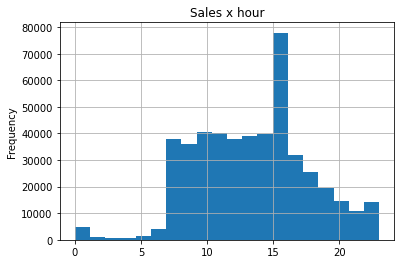

In [93]:
df_orders['order_hour_of_day'].plot(kind='hist',bins=20, xlabel= 'hours(0h-23h)', ylabel='Numbers of  orders', title='Sales x hour',grid=True)
plt.show()

2. Através do gráfico de histograma é possível avaliar as frequência de ocorrências de uma determinada variável, no nosso caso a hora das vendas.

    Desta forma pode-se inferir que 15h é o horário com o maior número de pedidos

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Bem executado o histograma, muito bom!
</div>

### [A3] Em que dia da semana as pessoas fazem compras?

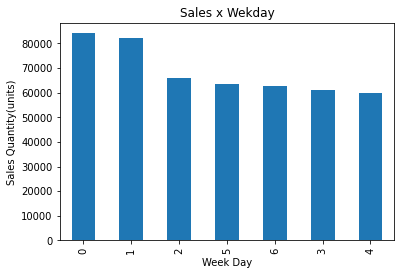

In [116]:
df_orders['order_dow'].value_counts().plot(kind='bar',x='order_dow',xlabel='Week Day', ylabel='Sales Quantity(units)',title='Sales x Wekday')
plt.show()

3. Os dias que mais temos vendas são no domingo e na segunda

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

De acordo com sua análise! Muito bom!
    
No entanto as barras grudadas em alguns casos e não grudadas em outrs dá uma sensação de descontinuidade que não faz muito sentido aqui dado que temos valores de 0 - 6. Vale a pena trocar o histograma por um gráfico de barras para mitigar essa questão.
</div>

<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Muito bom!
</div>


### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

count   157437.00
mean        12.85
std          8.88
min          0.00
25%          6.00
50%         10.80
75%         18.33
max         30.00
Name: days_since_prior_order, dtype: float64


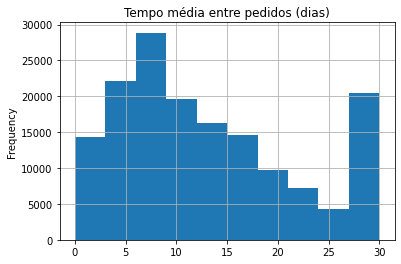

In [95]:
mean_time=df_orders.groupby(by='user_id')['days_since_prior_order'].mean()
print(mean_time.describe())
mean_time.plot(kind='hist', xlabel= 'Dias',title='Tempo média entre pedidos (dias)', grid=True)
plt.show()

#### O tempo médio entre um pedido e outro é de 14 dias. O tempo máximo é de 30 dias.

<div class="alert alert-warning">
<strong>Comentário do revisor v1</strong>

Excelente trabalho novamente nessa questão. 
Poderia ser interessante ter mais barras para termos mais detalhes do dia em questão.
</div>

# [B] Médio (é necessário concluir tudo para passar)

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa histogramas para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie histogramas para ambos os dias e descreva as diferenças.

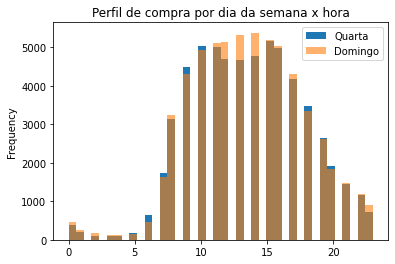

In [96]:
df_orders[df_orders['order_dow']==3]['order_hour_of_day'].plot(kind='hist',title = 'Perfil de compra por dia da semana x hora',bins=40)
df_orders[df_orders['order_dow']==6]['order_hour_of_day'].plot(kind='hist', bins=40, alpha=.6)
plt.legend(['Quarta','Domingo'])    
plt.show()                   

#### A maior parte das compras nesses dias são feitas entre 10h e 15h. Mas no domingo o pico de compras é das 13h às 15h

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Gostei muito da escolha da visualização, ela revela uma diferença importante entre 10 e 14h. Acho importante abordar esse ponto na sua conclusão.
</div>

### [B2] Qual é a distribuição do número de pedidos por cliente?

In [97]:
orders_per_id = df_orders.groupby(by='user_id').order_number.sum()
print(orders_per_id.describe())

count   157437.00
mean        52.20
std        110.10
min          1.00
25%          5.00
50%         13.00
75%         45.00
max       1450.00
Name: order_number, dtype: float64


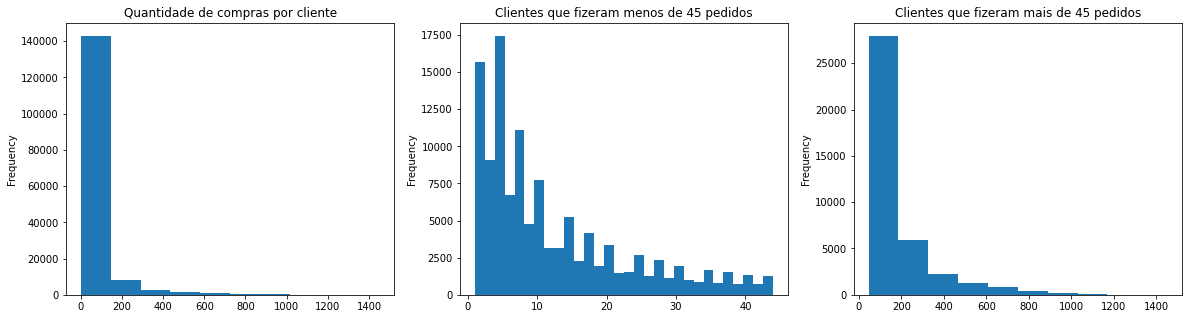

In [98]:
plt.figure(figsize=[20,5])
plt.subplot(131);orders_per_id.plot(kind='hist',bins=10,title='Quantidade de compras por cliente')
plt.subplot(132);orders_per_id[orders_per_id<45].plot(kind='hist',title='Clientes que fizeram menos de 45 pedidos',bins=30)
plt.subplot(133);orders_per_id[orders_per_id>45].plot(kind='hist',title='Clientes que fizeram mais de 45 pedidos',bins=10)
plt.show()

#### Para verificar a quantidade de compras por cliente agrupei o DataFrame pela coluna de usuário `user_id`,selecionou a coluna `order_numnber`(que tem os valores de pedidos por cliente) e combinei com a soma. 

    Ao utilizar a função describe, pude perceber que 75% dos clientes fizeram menos de 45 pedidos. Desta maneira separei em 3 gráficos. Priemiro para compras totais, segundo para compras menor que 45 e terceiro para compras maior que 45. Desta maneira pode-se perceber que a maior parte dos clientes fizeram menos de 10 pedidos. O cliente que mais fez pedidos foi de 1450 vezes.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente visualzações integradas ao describe! Muito boa a conclusão também.
</div>

### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [99]:
#verificar quais são os ids de produtos mais vendidos
products_quantity = df_order_products.groupby(by='product_id').order_id.count()
print(products_quantity)


product_id
1        280
2         11
3         42
4         49
7          2
        ... 
49690      5
49691     72
49692     12
49693     25
49694      9
Name: order_id, Length: 45573, dtype: int64


In [100]:
#Realizar slicing no df_products para termos 2 linhas: product_id e product_name
products_list=df_products.iloc[:,:2]
print(products_list)



       product_id                                       product_name
0               1                         chocolate sandwich cookies
1               2                                   all-seasons salt
2               3               robust golden unsweetened oolong tea
3               4  smart ones classic favorites mini rigatoni wit...
4               5                          green chile anytime sauce
...           ...                                                ...
49689       49690                      high performance energy drink
49690       49691                      original pancake & waffle mix
49691       49692    organic instant oatmeal light maple brown sugar
49692       49693                             spring water body wash
49693       49694                            burrito- steak & cheese

[49694 rows x 2 columns]


In [101]:
#Escolher método do merge entre products_quantity e products_list (afim de verificar o nome dos produtos)
#será utilizado o inner (somente aquilo que está nos 2 data frames)
most_sell = products_list.merge(products_quantity,left_on='product_id',right_index=True,how='inner').sort_values(by='order_id',ascending=False).rename(columns={'order_id':'quantity_sells'})
print(most_sell.head(20))

       product_id              product_name  quantity_sells
24851       24852                    banana           66050
13175       13176    bag of organic bananas           53297
21136       21137      organic strawberries           37039
21902       21903      organic baby spinach           33971
47208       47209      organic hass avocado           29773
47765       47766           organic avocado           24689
47625       47626               large lemon           21495
16796       16797              strawberries           20018
26208       26209                     limes           19690
27844       27845        organic whole milk           19600
27965       27966       organic raspberries           19197
22934       22935      organic yellow onion           15898
24963       24964            organic garlic           15292
45006       45007          organic zucchini           14584
39274       39275       organic blueberries           13879
49682       49683            cucumber ki

#### os produtos mais vendidos são de frutas

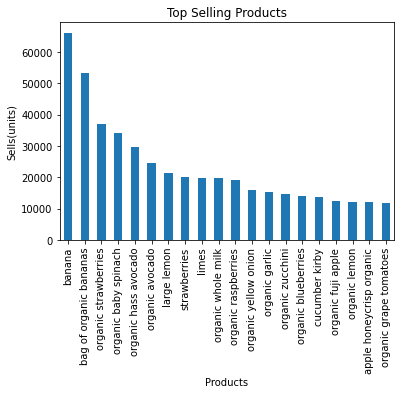

In [142]:
most_sell.head(20).plot(kind='bar',x='product_name', xlabel='Products', y='quantity_sells' ,ylabel='Sells(units)',title='Top Selling Products',legend=False)
plt.show()

<div class="alert alert-warning">
<strong>Comentário do revisor v1</strong>

Bom trabalho com a seleção.

Um gráfico seria uma evolução bastante interessante.
</div>

<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Perfeito
</div>


# [C] Difícil (é necessário concluir pelo menos duas perguntas para passar)

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

In [102]:
#realizar a contagem da quantidade de pedidos por ordem através do df_order_products
df_order_quantity=df_order_products.groupby(by='order_id').product_id.count().reset_index()
df_order_quantity = df_order_quantity.rename(columns={'product_id':'order_quantity'})
print(df_order_quantity)
print()
print('A média de produtos por pedido é de:',df_order_quantity['order_quantity'].mean().round(),'itens')

        order_id  order_quantity
0              4              13
1              9              15
2             11               5
3             19               3
4             20               8
...          ...             ...
450041   3421034              17
450042   3421053               9
450043   3421071               5
450044   3421077               4
450045   3421079               1

[450046 rows x 2 columns]

A média de produtos por pedido é de: 10.0 itens


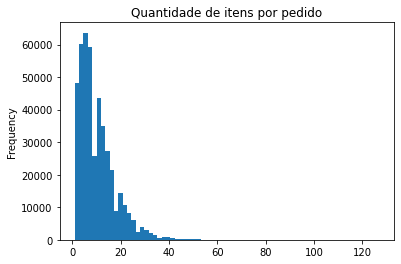

count   450046.00
mean        10.10
std          7.54
min          1.00
25%          5.00
50%          8.00
75%         14.00
max        127.00
Name: order_quantity, dtype: float64


In [103]:
df_order_quantity['order_quantity'].plot(kind='hist',title='Quantidade de itens por pedido', bins=70)
plt.show()
print(df_order_quantity['order_quantity'].describe())

#### Pode avaliar que a quantidade média itens por pedido é de 10 itens, E que 75% dos pedidos tem menos de 14 itens. A quantidade máxima de itens por pedido é de 127. 

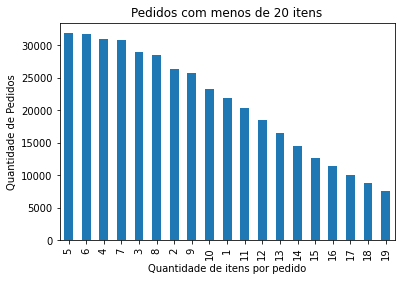

In [138]:
#Excluindo valores extremos. Limitando a quantidade de itens por pedido em 20
df_order_quantity_filter=df_order_quantity[df_order_quantity['order_quantity']<20]
df_order_quantity_filter['order_quantity'].value_counts().plot(kind='bar',x='order_quantity',title='Pedidos com menos de 20 itens',ylabel='Quantidade de Pedidos',xlabel='Quantidade de itens por pedido')
plt.show()


<div class="alert alert-warning">
<strong>Comentário do revisor v1</strong>

Correto! A visualização deve ser essa mesmo, mas pode ser interessante excluir os valores extremos para facilitar a leitura.
</div>

<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Ótimo!
</div>


### [C2] Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.

In [104]:
#Filtrando os pedidos repetidos
#Agrupar por product_id e somar a coluna reordered de modo a obter os produtos mais frequentes
#Alterando o nome da coluna reordered
filter_order_products = df_order_products[df_order_products['reordered']==1]
filter_order_products = filter_order_products.groupby(by='product_id').reordered.sum().reset_index().sort_values(by='reordered',ascending=False)
filter_order_products.rename(columns={'reordered':'quantity'},inplace=True)
print(filter_order_products)

       product_id  quantity
18104       24852     55763
9528        13176     44450
15368       21137     28639
15936       21903     26233
34407       47209     23629
...           ...       ...
5120         7092         1
15278       21003         1
23932       32856         1
31131       42727         1
17558       24091         1

[36228 rows x 2 columns]


In [105]:
#Realizar slicing de maneira a obter a parte em comum,product_id, entre df_products e df_order_products
df_product_id_name = df_products.iloc[:,:2]
print(df_product_id_name)

       product_id                                       product_name
0               1                         chocolate sandwich cookies
1               2                                   all-seasons salt
2               3               robust golden unsweetened oolong tea
3               4  smart ones classic favorites mini rigatoni wit...
4               5                          green chile anytime sauce
...           ...                                                ...
49689       49690                      high performance energy drink
49690       49691                      original pancake & waffle mix
49691       49692    organic instant oatmeal light maple brown sugar
49692       49693                             spring water body wash
49693       49694                            burrito- steak & cheese

[49694 rows x 2 columns]


In [106]:
#Realizar merge() de maneira a ter a ligação entre os itens repetidos mais pedidos e os nomes dos produtos
#Imprimir os 20 mais
filter_order_products_name = filter_order_products.merge(df_product_id_name,on='product_id')
print(filter_order_products_name.head(20))

    product_id  quantity              product_name
0        24852     55763                    banana
1        13176     44450    bag of organic bananas
2        21137     28639      organic strawberries
3        21903     26233      organic baby spinach
4        47209     23629      organic hass avocado
5        47766     18743           organic avocado
6        27845     16251        organic whole milk
7        47626     15044               large lemon
8        27966     14748       organic raspberries
9        16797     13945              strawberries
10       26209     13327                     limes
11       22935     11145      organic yellow onion
12       24964     10411            organic garlic
13       45007     10076          organic zucchini
14       49683      9538            cucumber kirby
15       28204      8989        organic fuji apple
16        8277      8836  apple honeycrisp organic
17       39275      8799       organic blueberries
18        5876      8412       

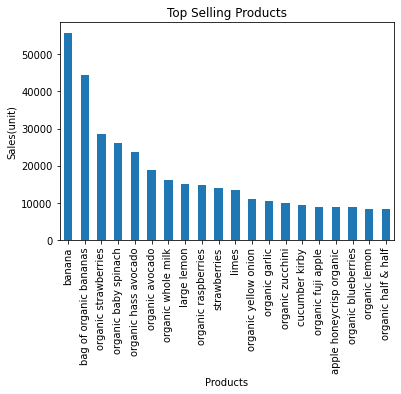

In [141]:
filter_order_products_name.head(20).plot(kind='bar', x='product_name', y='quantity',xlabel='Products',legend=False, ylabel='Sales(unit)',title='Top Selling Products')
plt.show()

Aqui temos os itens que são mais frequentes em cada pedido repetido

<div class="alert alert-warning">
<strong>Comentário do revisor v1</strong>

Perfeito o trabalho com a detecção! Acho que um gráfico de barras novamente ajudaria bastante na ilustração do resultado.
</div>

<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Excelente!
</div>


### [C3] Para cada produto, qual parcela de todos os pedidos dele são repetidos?

In [107]:
#A média dos produtos que já foram comprados antes(repetidos)
mean_by_product_id = (df_order_products.groupby(by='product_id')['reordered'].mean())*100
print(mean_by_product_id)

product_id
1       56.43
2        0.00
3       73.81
4       51.02
7       50.00
         ... 
49690   80.00
49691   43.06
49692   41.67
49693   44.00
49694   33.33
Name: reordered, Length: 45573, dtype: float64


#### Pode-se concluir que itens com `0`, são itens que o cliente está comprando pela primeira vez e itens com `100%` são os itens que aquele cliente compra com mais frequência

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Perfeito o resultado!
</div>

### [C4] Para cada cliente, qual proporção de todos os seus pedidos são repetidos?

In [108]:
#Realizar slicing de maneira a obter a parte em comum, order_id, entre df_orders e df_order_products
id_order = df_orders.iloc[:,:2]
print(id_order)

        order_id  user_id
0        1515936   183418
1        1690866   163593
2        1454967    39980
3        1768857    82516
4        3007858   196724
...          ...      ...
478962   3210681     5617
478963   3270802   112087
478964    885349    82944
478965    216274     4391
478966   2071924     1730

[478952 rows x 2 columns]


In [109]:
#Realizar o merge() de maneira que tenhamos os pedidos que cada cliente realizou que são repetidos (reordered=1)
df_orders_by_id = df_order_products.merge(id_order, on='order_id')
print(df_orders_by_id)


         order_id  product_id  add_to_cart_order  reordered  user_id
0         2141543       11440                 17          0    58454
1         2141543       31869                 15          1    58454
2         2141543       30233                  9          1    58454
3         2141543       27966                 20          1    58454
4         2141543       13176                  2          1    58454
...           ...         ...                ...        ...      ...
4545002   1790509       43739                  1          1    60894
4545003   1274005       38275                  1          1    32958
4545004    812418       46149                  1          1   130466
4545005   2666881         196                  1          1    33946
4545006   1461911       33198                  1          1    54019

[4545007 rows x 5 columns]


Aqui passamos a ter a relação user_id x order_id x product_id, ou seja, o número do pedido que cada cliente comprou, o que cada cliente comprou e se é a primeira vez que ele compra

In [110]:
print(df_orders_by_id.groupby(by='user_id')['reordered'].mean())

user_id
2        0.04
4        0.00
5        0.67
6        0.00
7        0.93
         ... 
206203   0.22
206206   0.71
206207   0.89
206208   0.70
206209   0.32
Name: reordered, Length: 149626, dtype: float64


#### Desta maneira pode-se destacar os clientes que tem maior tendência a comprar sempre as mesmas coisas e os clientes que estão comprando pela primeira vez 

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Correto mais uma vez.
</div>

### [C5] Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

banana                         15562
bag of organic bananas         11026
organic whole milk              4363
organic strawberries            3946
organic hass avocado            3390
organic baby spinach            3336
organic avocado                 3044
spring water                    2336
strawberries                    2308
organic raspberries             2024
sparkling water grapefruit      1914
organic half & half             1797
large lemon                     1737
soda                            1733
organic reduced fat milk        1397
limes                           1370
hass avocados                   1340
organic reduced fat 2% milk     1310
half & half                     1309
raspberries                     1246
Name: product_name, dtype: int64


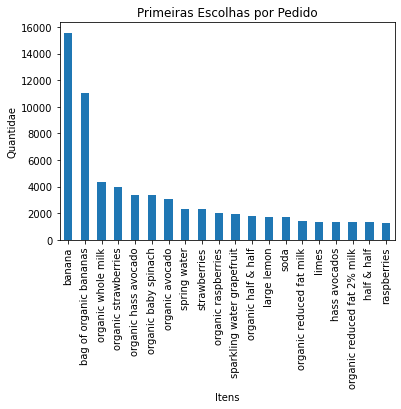

In [183]:
#Filtrar somente os itens que foram adicionados pro primeiro no carrinho (add_to_cart_order=1)
#Feito slicing para ter somente as colunas de interesse
#Merge entre os dfs para poder acessar os nomes dos produtos
#Contar as ocorrências pelo nome, ordenar em ordem decrescente
df_order_products_filter = df_order_products[df_order_products['add_to_cart_order']==1]
df_order_products_filter=df_order_products_filter.iloc[:,:2]
df_products_name = df_products.iloc[:,:2]
products_by_name = df_order_products_filter.merge(df_products_name,on='product_id')
print(products_by_name['product_name'].value_counts().sort_values(ascending=False).head(20))
products_by_name['product_name'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar',xlabel='Itens', ylabel='Quantidae', title='Primeiras Escolhas por Pedido')
plt.show()



#### Banana é disparado o primeiro item adicionado no carrinho

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Esse resultado está errado. Acho que acabou se confundindo ali nas manipulações da tabela... Posso sugerir uma outra abordagem?

Comece filtrando apenas os produtos colocados em primeiro lugar no carrinho na tabela df_order_products.

Feito isso cruze para pegar o nome e conte o número de ocorrências. Dessa forma devemos ter o resultado correto!
</div>



<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Perfeito agora, muito bom!
</div>



<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Estamos no caminho certo com essa versão, mas retocar os pontos indicados acima nos fará chegar em um resultado ainda mais incrível.
    
Conte comigo para ajudá-lo (a) em qualquer questão que possa vir a ter! Lembre-se de usar as caixas azuis para se comunicar comigo.
    
Até breve.
</div>


<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Trabalho muito sólido com o projeto! Gostei muito.
    
    
Parabéns pela aprovação e até breve!
</div>


Temos observações importantes para serem consideradas:
- Sobre o perfil de compra tendo os domingos e segundas como dias com maior volume de vendas. 
- O período entre 10h e 15h concentrando a maior parte das vendas, exceto pelo domingo que é de 13h às 15h. 
- Tempo médio entre pedidos é de 14 dias.
- A categoria dos itens mais vendidos é a de frutas.
- A banana é o  item mais vendido e o primeiro a ser adicionado
